<a href="https://colab.research.google.com/github/arsalanrzp/Pattern-Recognition/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
subset_X_flat = train_X.reshape(-1, 28*28)
kmeans = KMeans(n_clusters=10)
kmeans.fit(subset_X_flat)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

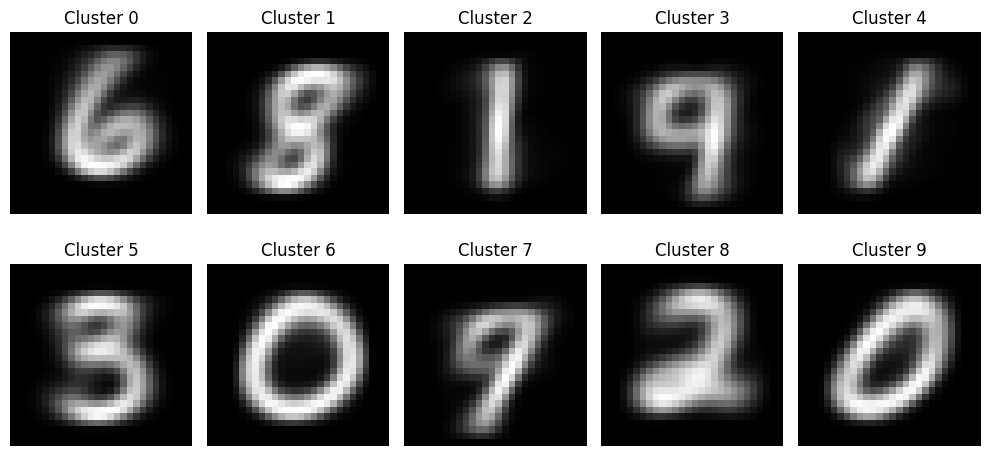

In [ ]:
import matplotlib.pyplot as plt

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Reshape centroids back into 28x28 images
centroids_images = centroids.reshape(-1, 28, 28)

# Plot the centroids
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(centroids_images[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
class KMeansCustom:

    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.allclose(new_centroids, self.centroids):
                break
            self.centroids = new_centroids
        return self

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels


In [ ]:
def calculate_cluster_centers(X, labels, n_clusters):
    cluster_centers = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        cluster_centers[i] = X[labels == i].mean(axis=0)
    return cluster_centers


In [ ]:

kmeans_custom = KMeansCustom(n_clusters=10)
kmeans_custom.fit(subset_X_flat)
labels = kmeans_custom.predict(subset_X_flat)
centroids_custom = calculate_cluster_centers(subset_X_flat, labels, n_clusters=10)


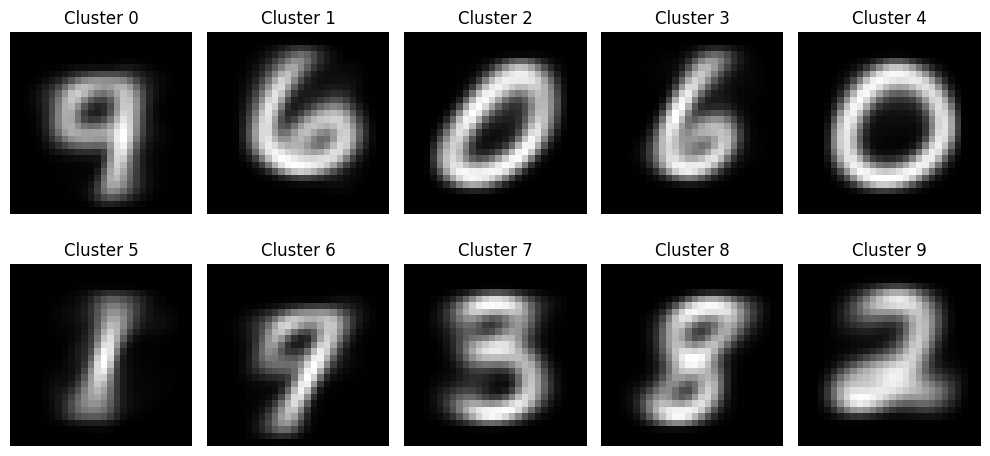

In [ ]:
centroids_images = centroids_custom.reshape(-1, 28, 28)

# Plot the centroids
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(centroids_images[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()